# Importing some libraries

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [48]:
df = pd.read_csv('Churn_Modelling.csv')

In [49]:
df.shape

(10000, 14)

In [50]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [51]:
df.Age.max()

92

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

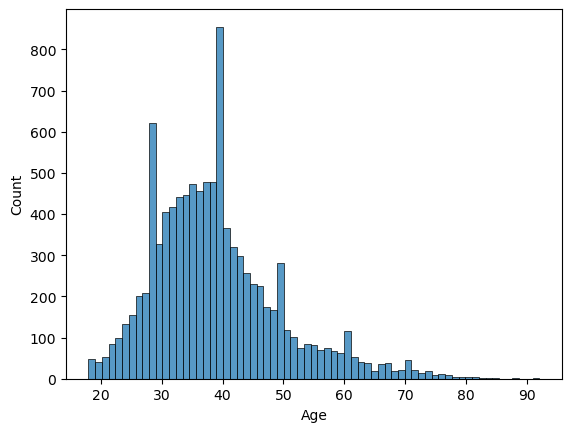

In [52]:
sns.histplot(df['Age'])

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Balance', ylabel='Count'>

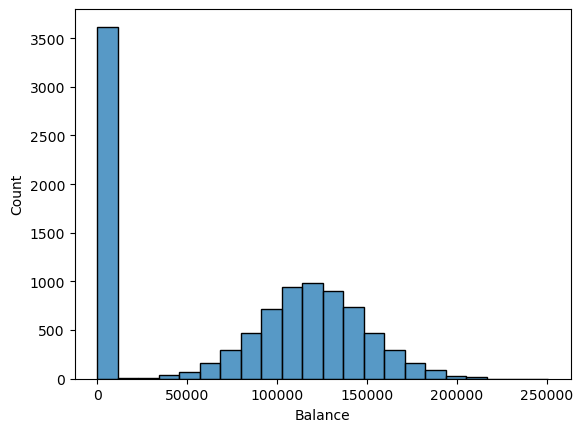

In [53]:

sns.histplot(df['Balance'])

c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

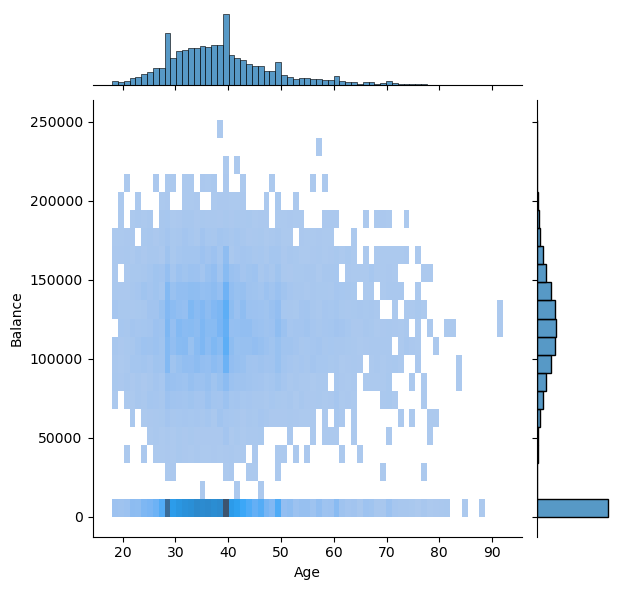

In [54]:
#combining the plots
sns.jointplot(x=df['Age'], y=df['Balance'], kind='hist')
plt.show()


# Droping unneccessry columns

In [55]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'],inplace=True)

# Creating bins for Age columns

In [56]:
from sklearn.preprocessing import KBinsDiscretizer
bined=KBinsDiscretizer(encode='ordinal',strategy='uniform',dtype=None)

In [57]:
bined

KBinsDiscretizer(encode='ordinal', strategy='uniform')

In [58]:
df['age_bin']=bined.fit_transform(df[['Age']])

In [59]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_bin'],
      dtype='object')

<Axes: >

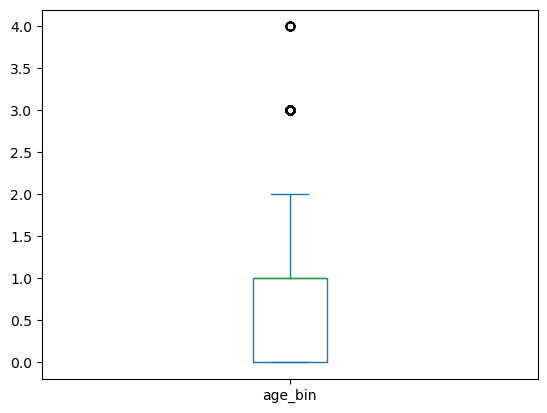

In [60]:
df['age_bin'].plot(kind='box')

In [61]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
age_bin               5
dtype: int64

In [62]:

# time=[18,30,45,60,75,80]

# category=[0,1,2,3,4]

# df["age_bin"] = pd.cut(df["Age"], bins=time, labels=category, right=False)

In [63]:
df['age_bin'].value_counts()

age_bin
1.0    5500
0.0    2790
2.0    1351
3.0     335
4.0      24
Name: count, dtype: int64

In [64]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'age_bin'],
      dtype='object')

In [65]:
df.drop(columns=['Age'],inplace=True)

In [66]:
X = df.drop(columns=['Exited']).values
y = df['Exited'].values

In [67]:
X

array([[619, 'France', 'Female', ..., 1, 101348.88, 1.0],
       [608, 'Spain', 'Female', ..., 1, 112542.58, 1.0],
       [502, 'France', 'Female', ..., 0, 113931.57, 1.0],
       ...,
       [709, 'France', 'Female', ..., 1, 42085.58, 1.0],
       [772, 'Germany', 'Male', ..., 0, 92888.52, 1.0],
       [792, 'France', 'Female', ..., 0, 38190.78, 0.0]], dtype=object)

# One hot encoding

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[1])],remainder='passthrough')

In [69]:
X = ct.fit_transform(X)


In [70]:
ct = ColumnTransformer(transformers=[('onehot',OneHotEncoder(),[4])],remainder='passthrough')
X = ct.fit_transform(X)


In [71]:
X[4]

array([1.0, 0.0, 0.0, 0.0, 1.0, 850, 2, 125510.82, 1, 1, 1, 79084.1, 1.0],
      dtype=object)

In [72]:
from sklearn.preprocessing import StandardScaler
sta=StandardScaler()
X = sta.fit_transform(X)

In [73]:
X

array([[ 1.09598752, -1.09598752,  0.99720391, ...,  0.97024255,
         0.02188649,  0.09274048],
       [ 1.09598752, -1.09598752, -1.00280393, ...,  0.97024255,
         0.21653375,  0.09274048],
       [ 1.09598752, -1.09598752,  0.99720391, ..., -1.03067011,
         0.2406869 ,  0.09274048],
       ...,
       [ 1.09598752, -1.09598752,  0.99720391, ...,  0.97024255,
        -1.00864308,  0.09274048],
       [-0.91241915,  0.91241915, -1.00280393, ..., -1.03067011,
        -0.12523071,  0.09274048],
       [ 1.09598752, -1.09598752,  0.99720391, ..., -1.03067011,
        -1.07636976, -1.2378259 ]])

# Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [75]:
# logistic regression
# polynomial regression


# Importing the models

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#0from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [77]:
classifiers = {}


classifiers['Logistic Regression'] = LogisticRegression()
classifiers['K-Nearest Neighbors'] = KNeighborsClassifier()
classifiers['Support Vector Machine'] = SVC()
classifiers['Decision Tree'] = DecisionTreeClassifier()
classifiers['Random Forest'] = RandomForestClassifier()


# Training the models

In [78]:
for name, model in classifiers.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    print("="*50)

Training Logistic Regression...
Evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1595
           1       0.57      0.21      0.31       405

    accuracy                           0.81      2000
   macro avg       0.70      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000

Training K-Nearest Neighbors...
Evaluating K-Nearest Neighbors...
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      1595
           1       0.57      0.38      0.46       405

    accuracy                           0.82      2000
   macro avg       0.71      0.65      0.67      2000
weighted avg       0.80      0.82      0.80      2000

Training Support Vector Machine...
Evaluating Support Vector Machine...
Classification Report for Support Vector Machine

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# from sklearn.metrics import plot_confusion_matrix


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for name, model in classifiers.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Print evaluation metrics
    print(f"Evaluation Metrics for {name}:")
    for metric in metrics:
        print(f"{metric}: {scores[metric]}")
    
    # Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    print("="*50)

Evaluating Logistic Regression...
Evaluation Metrics for Logistic Regression:
Accuracy: 0.8085
Precision: 0.5733333333333334
Recall: 0.2123456790123457
F1-Score: 0.3099099099099099
ROC AUC: 0.586110143581408
Confusion Matrix for Logistic Regression:
[[1531   64]
 [ 319   86]]
Evaluating K-Nearest Neighbors...
Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.817
Precision: 0.5719557195571956
Recall: 0.38271604938271603
F1-Score: 0.45857988165680474
ROC AUC: 0.6549943883277216
Confusion Matrix for K-Nearest Neighbors:
[[1479  116]
 [ 250  155]]
Evaluating Support Vector Machine...
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.8545
Precision: 0.8131868131868132
Recall: 0.3654320987654321
F1-Score: 0.504258943781942
ROC AUC: 0.6720577421726847
Confusion Matrix for Support Vector Machine:
[[1561   34]
 [ 257  148]]
Evaluating Decision Tree...
Evaluation Metrics for Decision Tree:
Accuracy: 0.78
Precision: 0.46153846153846156
Recall: 0.5185185185185185
F1-Score: 0.4883720

In [80]:
para_grid = {'n_estimators': [100, 200, 300,500], 'max_depth': [None, 10, 20, 30,50], 'min_samples_split': [2, 5, 10,20]}

# Model Evaluation

In [81]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [82]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']

for name, model in classifiers.items():
    print(f"Evaluating {name}...")
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Print evaluation metrics
    print(f"Evaluation Metrics for {name}:")
    for metric in metrics:
        print(f"{metric}: {scores[metric]}")
    
    # Confusion Matrix
    print(f"Confusion Matrix for {name}:")
    print(confusion_matrix(y_test, y_pred))
    
    print("="*50)

Evaluating Logistic Regression...
Evaluation Metrics for Logistic Regression:
Accuracy: 0.8085
Precision: 0.5733333333333334
Recall: 0.2123456790123457
F1-Score: 0.3099099099099099
ROC AUC: 0.586110143581408
Confusion Matrix for Logistic Regression:
[[1531   64]
 [ 319   86]]
Evaluating K-Nearest Neighbors...
Evaluation Metrics for K-Nearest Neighbors:
Accuracy: 0.817
Precision: 0.5719557195571956
Recall: 0.38271604938271603
F1-Score: 0.45857988165680474
ROC AUC: 0.6549943883277216
Confusion Matrix for K-Nearest Neighbors:
[[1479  116]
 [ 250  155]]
Evaluating Support Vector Machine...
Evaluation Metrics for Support Vector Machine:
Accuracy: 0.8545
Precision: 0.8131868131868132
Recall: 0.3654320987654321
F1-Score: 0.504258943781942
ROC AUC: 0.6720577421726847
Confusion Matrix for Support Vector Machine:
[[1561   34]
 [ 257  148]]
Evaluating Decision Tree...
Evaluation Metrics for Decision Tree:
Accuracy: 0.78
Precision: 0.46153846153846156
Recall: 0.5185185185185185
F1-Score: 0.4883720

Based on the evaluation metrics, the best model appears to be Random Forest so far

In [83]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Calculate evaluation metrics
# accuracy = accuracy_score(y_test, nn_predictions)
# precision = precision_score(y_test, nn_predictions)
# recall = recall_score(y_test, nn_predictions)
# f1 = f1_score(y_test, nn_predictions)
# conf_matrix = confusion_matrix(y_test, nn_predictions)

# # Print evaluation metrics
# print("Evaluation Metrics for MLPClassifier:")
# print(f"Accuracy: {accuracy}")
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"F1-Score: {f1}")
# print("Confusion Matrix:")
# print(conf_matrix)


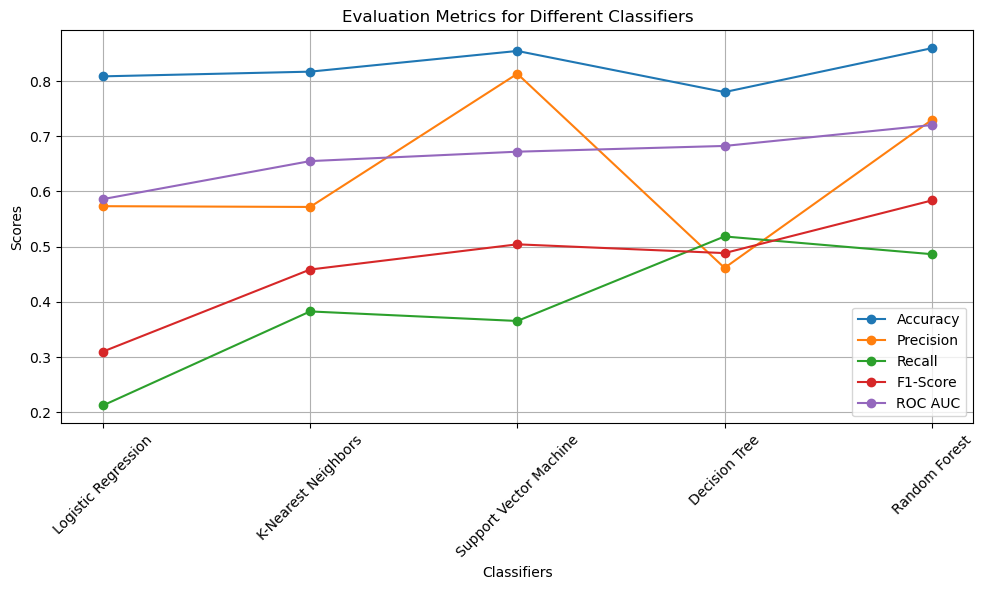

In [84]:
import matplotlib.pyplot as plt

# Initialize lists to store scores for each metric
metric_scores = {metric: [] for metric in metrics}

# Loop through classifiers and calculate scores
for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    # Store scores for each metric
    for metric in metrics:
        metric_scores[metric].append(scores[metric])

# Plotting
plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.plot(list(classifiers.keys()), metric_scores[metric], label=metric, marker='o')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Different Classifiers')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


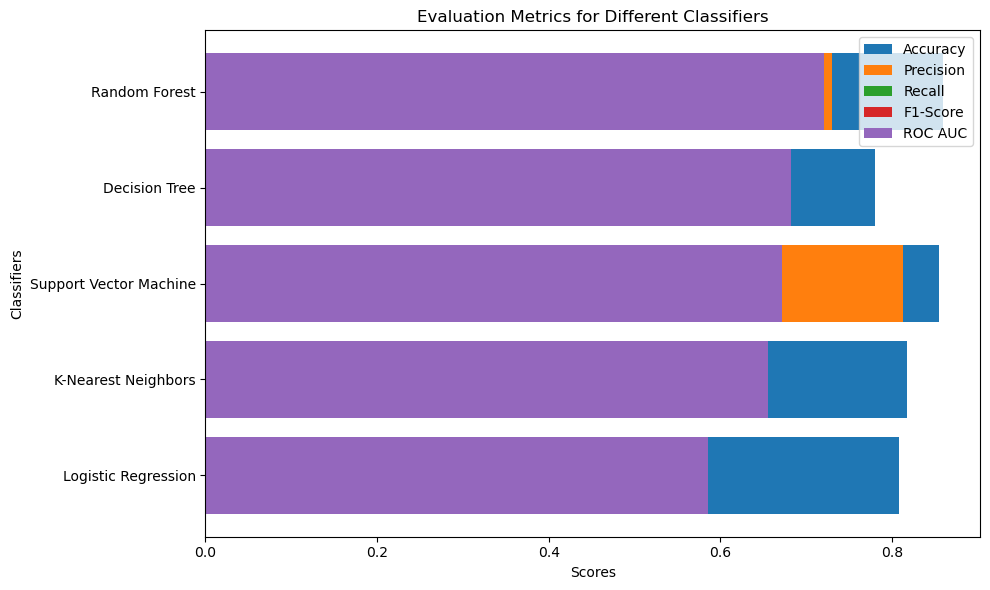

'\n# Iterate over classifiers\nfor name, model in classifiers.items():\n    # Calculate predictions\n    y_pred = model.predict(X_test)\n    \n    # Calculate evaluation metrics\n    scores = {\n        \'Accuracy\': accuracy_score(y_test, y_pred),\n        \'Precision\': precision_score(y_test, y_pred),\n        \'Recall\': recall_score(y_test, y_pred),\n        \'F1-Score\': f1_score(y_test, y_pred),\n        \'ROC AUC\': roc_auc_score(y_test, y_pred)\n    }\n    \n    # Plotting\n    plt.figure(figsize=(10, 6))\n    plt.bar(scores.keys(), scores.values(), color=\'skyblue\')\n    plt.title(f"Evaluation Metrics for {name}")\n    plt.xlabel(\'Metrics\')\n    plt.ylabel(\'Scores\')\n    plt.xticks(rotation=45)\n    plt.show()\n'

In [85]:
# Plotting a bar plot
# plt.figure(figsize=(10, 6))

# for metric in metrics:
#     plt.bar(list(classifiers.keys()), metric_scores[metric], label=metric)

# plt.xlabel('Classifiers')
# plt.ylabel('Scores')
# plt.title('Evaluation Metrics for Different Classifiers')
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()




plt.figure(figsize=(10, 6))

for metric in metrics:
    plt.barh(list(classifiers.keys()), metric_scores[metric], label=metric)

plt.ylabel('Classifiers')
plt.xlabel('Scores')
plt.title('Evaluation Metrics for Different Classifiers')
plt.legend()
plt.tight_layout()
plt.show()


# # Create subplots for each metric
# fig, axes = plt.subplots(nrows=len(metrics), ncols=1, figsize=(10, 6), sharex=True)

# # Loop through each metric and plot
# for i, metric in enumerate(metrics):
#     axes[i].bar(list(classifiers.keys()), metric_scores[metric])
#     axes[i].set_ylabel(metric)
#     axes[i].set_title(f'{metric} for Different Classifiers')

# # Set common x-axis label
# fig.text(0.5, 0.04, 'Classifiers', ha='center')
# plt.xticks(rotation=45)

# plt.tight_layout()
# plt.show()
'''
# Iterate over classifiers
for name, model in classifiers.items():
    # Calculate predictions
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    scores = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred)
    }
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(scores.keys(), scores.values(), color='skyblue')
    plt.title(f"Evaluation Metrics for {name}")
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.xticks(rotation=45)
    plt.show()
'''




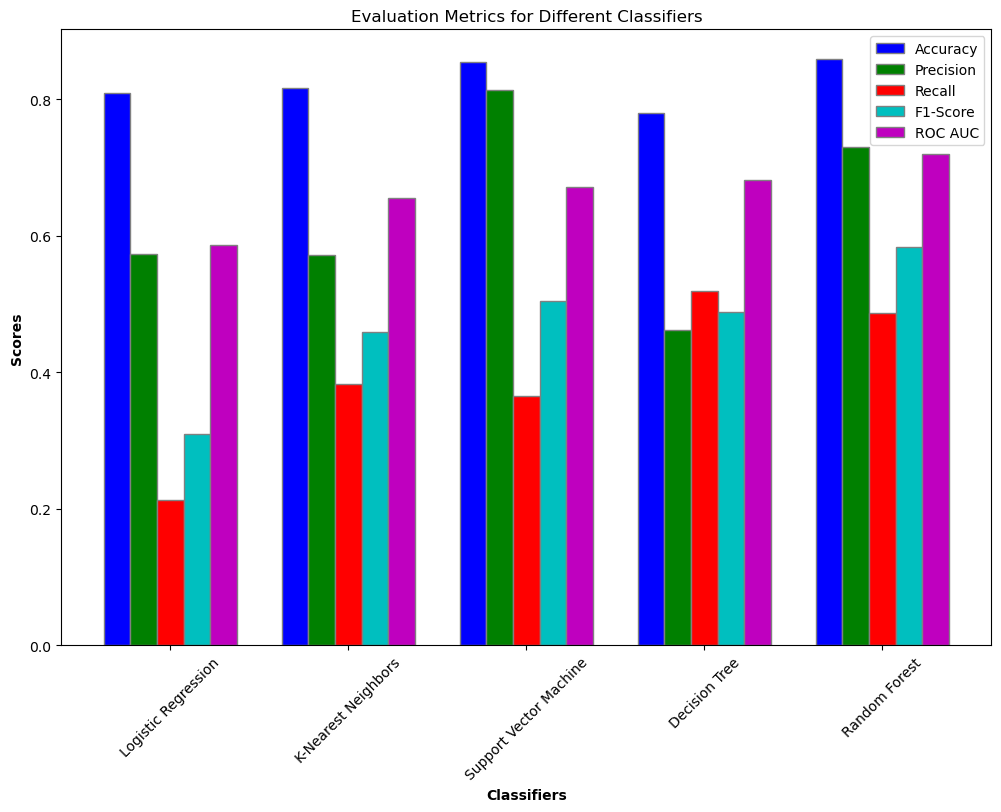

In [86]:
import numpy as np

# Set up figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Set width of bar
bar_width = 0.15

# Set position of bar on X axis
r1 = np.arange(len(classifiers))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Define colors for each metric
colors = ['b', 'g', 'r', 'c', 'm']

# Plotting bars for each metric
for i, (metric, color) in enumerate(zip(metrics, colors)):
    ax.bar(r1 + i * bar_width, [metric_scores[metric][i] for i in range(len(classifiers))], color=color, width=bar_width, edgecolor='grey', label=metric)

# Add xticks on the middle of the group bars
ax.set_xlabel('Classifiers', fontweight='bold')
ax.set_ylabel('Scores', fontweight='bold')
ax.set_xticks([r + 2 * bar_width for r in range(len(classifiers))])
ax.set_xticklabels(classifiers.keys(), rotation=45)

# Create legend & Show graphic
ax.legend()
plt.title('Evaluation Metrics for Different Classifiers')
plt.show()


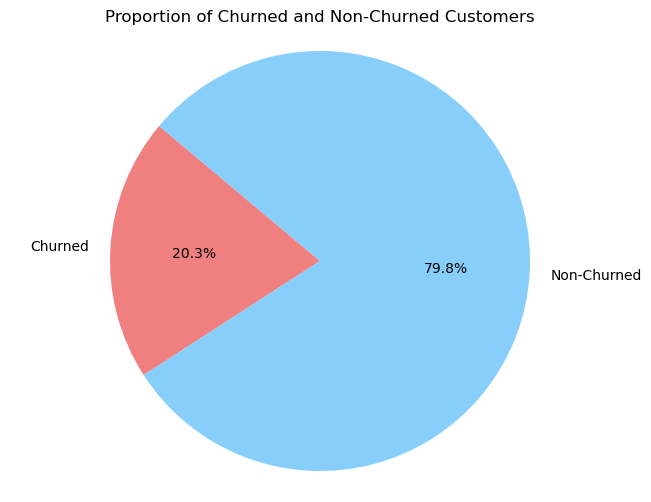

In [87]:
# Calculate the number of churned and non-churned users
churned_count = sum(y_test == 1)
non_churned_count = sum(y_test == 0)

# Draw a pie chart
plt.figure(figsize=(8, 6))
labels = ['Churned', 'Non-Churned']
sizes = [churned_count, non_churned_count]
colors = ['lightcoral', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Proportion of Churned and Non-Churned Customers')
plt.show()


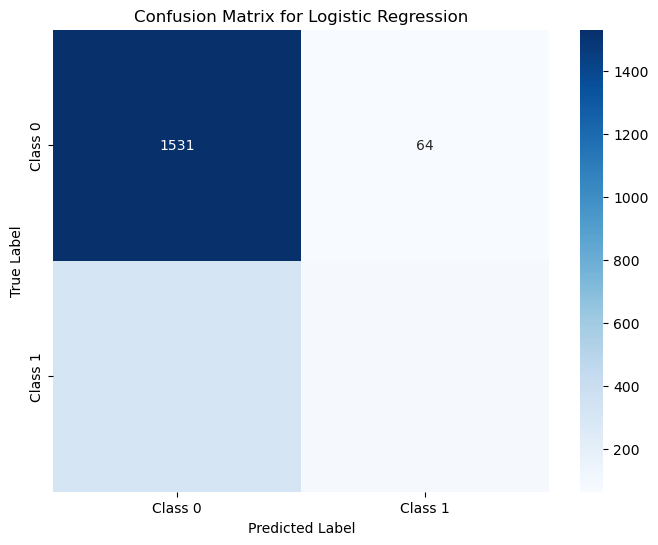

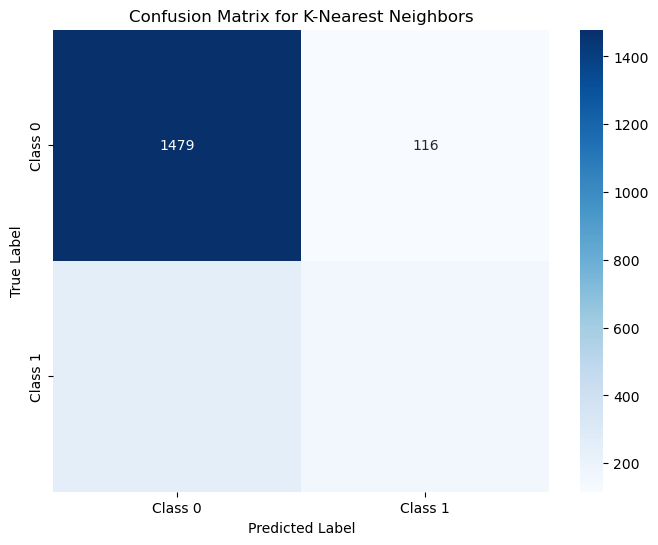

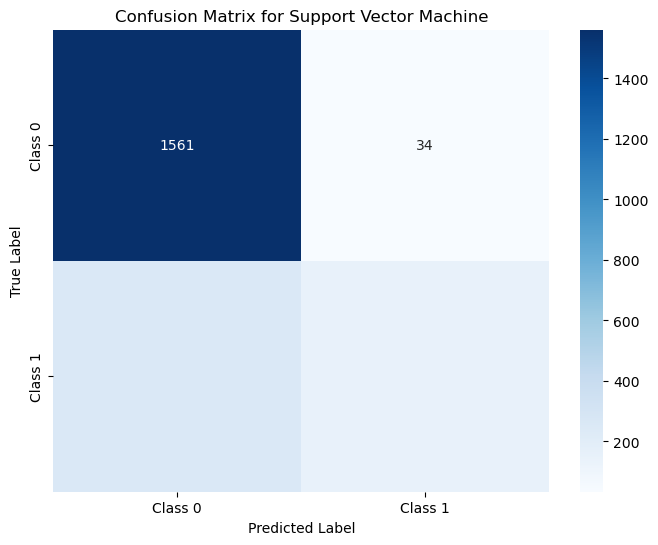

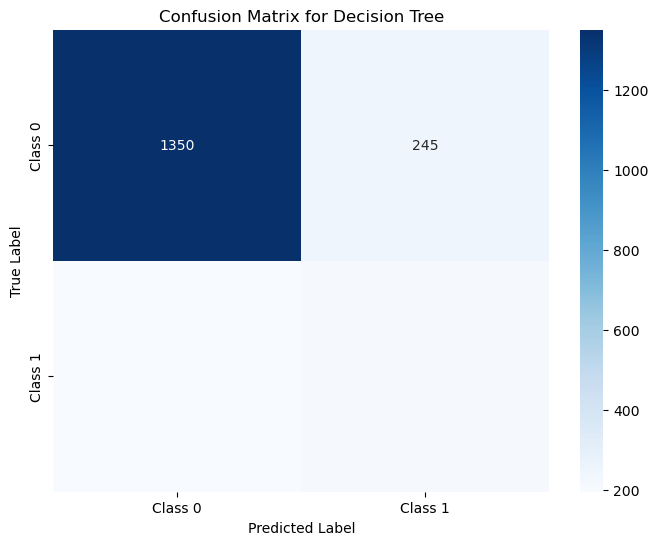

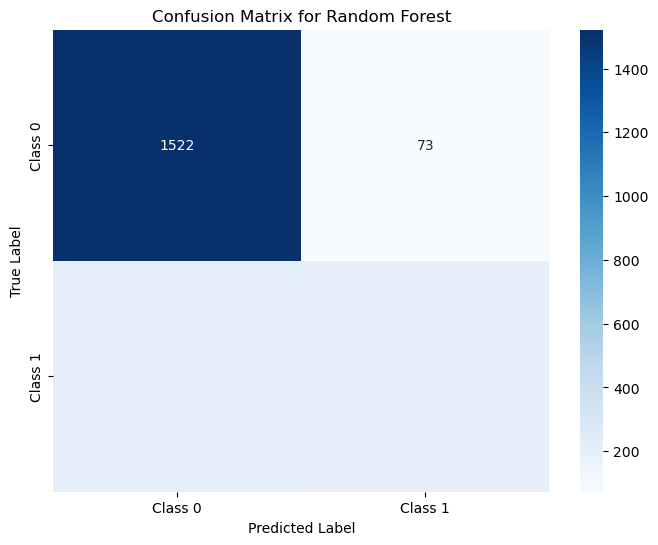

In [88]:
# for confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Iterate over classifiers
for name, model in classifiers.items():
    # Calculate predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


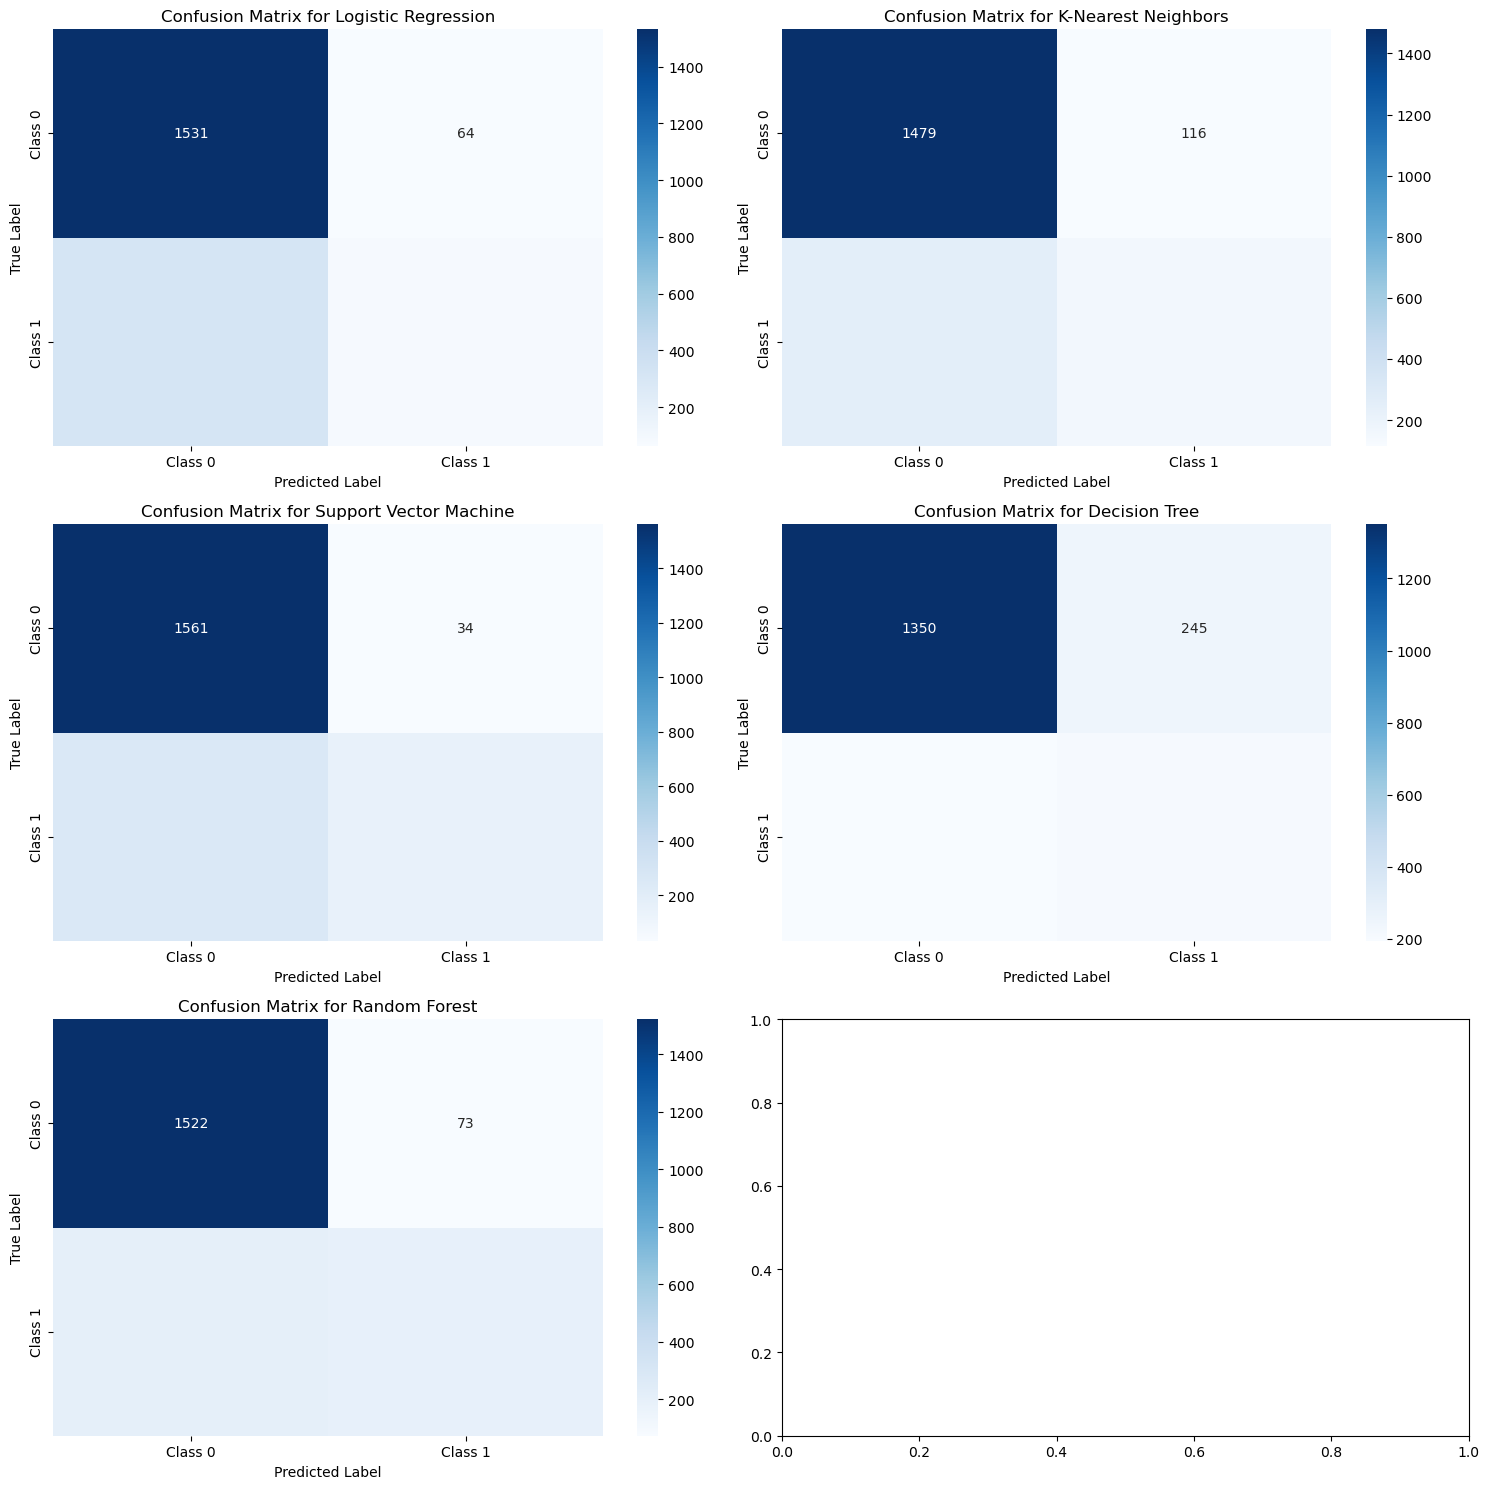

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Set up subplots
num_classifiers = len(classifiers)
num_rows = num_classifiers // 2 + num_classifiers % 2
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5*num_rows))

# Iterate over classifiers
for (name, model), ax in zip(classifiers.items(), axes.flatten()):
    # Calculate predictions
    y_pred = model.predict(X_test)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'], ax=ax)
    ax.set_title(f'Confusion Matrix for {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# Adjust layout
plt.tight_layout()
plt.show()


In [90]:
#AUC curve

In [91]:
#Modal accuracy Loss accuracy

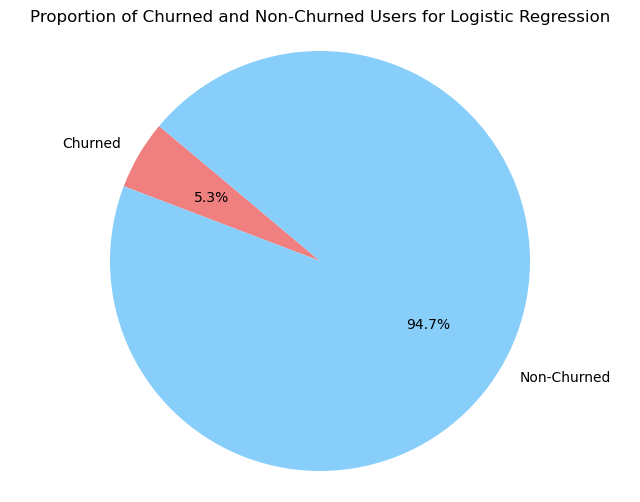

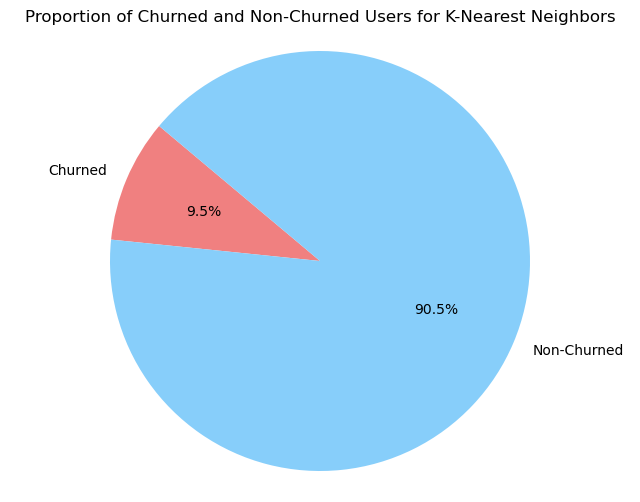

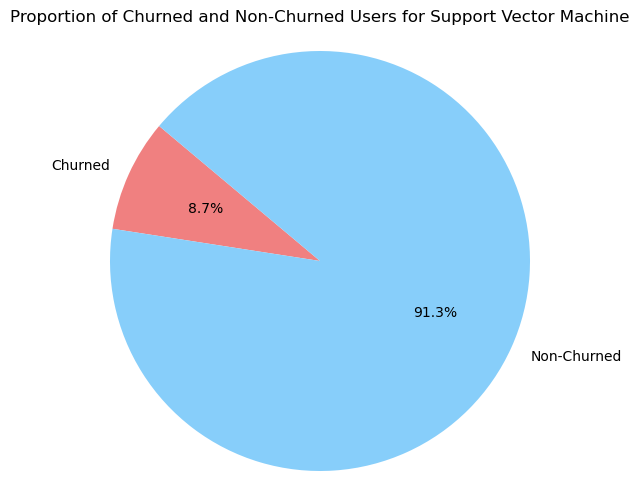

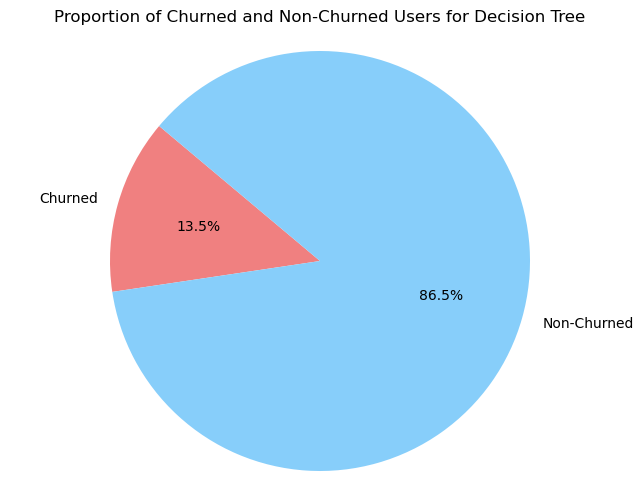

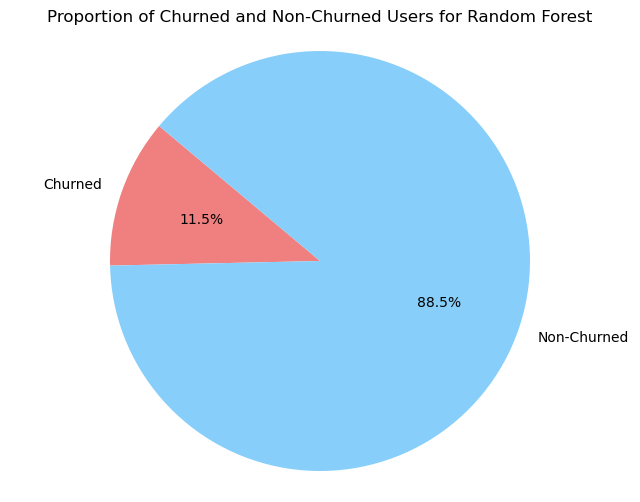

In [92]:
# Initialize dictionaries to store churned and non-churned counts for each algorithm
churned_counts = {}
non_churned_counts = {}

# Loop through classifiers
for name, model in classifiers.items():
    y_pred = model.predict(X_test)
    # Calculate churned and non-churned counts
    churned_counts[name] = sum((y_test == 1) & (y_pred == 1))
    non_churned_counts[name] = sum((y_test == 0) & (y_pred == 0))

# Plotting
for name in classifiers.keys():
    plt.figure(figsize=(8, 6))
    labels = ['Churned', 'Non-Churned']
    sizes = [churned_counts[name], non_churned_counts[name]]
    colors = ['lightcoral', 'lightskyblue']
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.axis('equal')
    plt.title(f'Proportion of Churned and Non-Churned Users for {name}')
    plt.show()
